In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading the dataset
train_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Loading the dataset
test_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
#Data Type of the traning Dataset
df = train_data
df.info()
list(train_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [9]:
print(f"Training Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Training Data Shape: (1460, 81)
Test Data Shape: (1459, 80)


In [10]:
#Find out the unique values in each column of the training set.
print("Finding the unique values in each column of the training set")
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {train_data[col].nunique()} unique values")

Finding the unique values in each column of the training set
MSZoning: 5 unique values
Street: 2 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 3 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinType2: 6 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 5 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
FireplaceQu: 5 unique values
GarageType: 6 unique values
Ga

In [11]:
"""Find out the missing values in each column of the training set 
These values will need to be filled or the columns will need to be dropped so that
it doesn't throw errors with the model. """
missing_train_data = train_data.isnull().sum()
missing_train_data = missing_train_data[missing_train_data > 0].sort_values(ascending=False)

print("Missing Values in Training Data:")
display(missing_train_data)


Missing Values in Training Data:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [12]:
missing_test_data = test_data.isnull().sum()
missing_test_data = missing_test_data[missing_test_data > 0].sort_values(ascending=False)

print("Missing Values in Test Data:")
display(missing_test_data)

Missing Values in Test Data:


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

# Visualize the Dataset

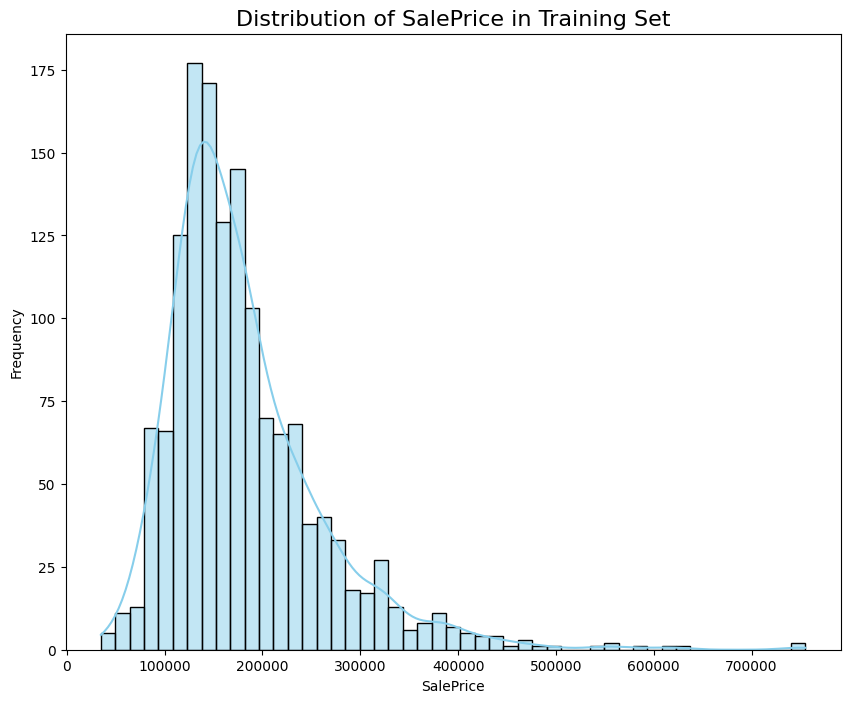

In [13]:
plt.figure(figsize=(10, 8))
sns.histplot(train_data['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of SalePrice in Training Set', fontsize=16)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

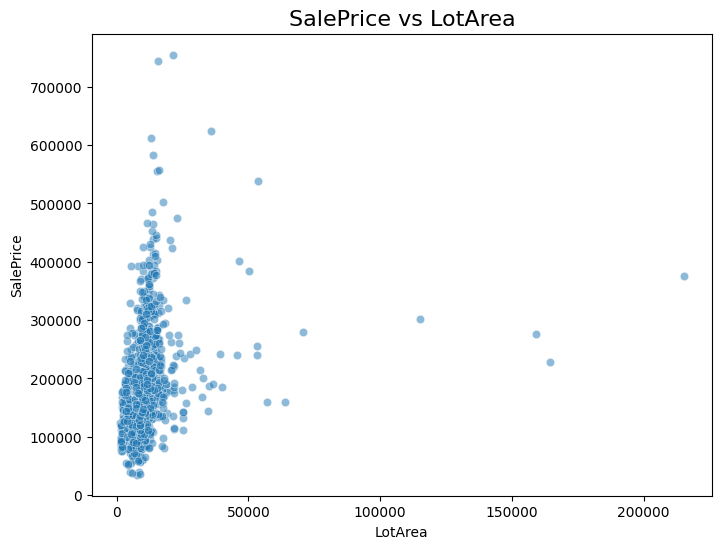

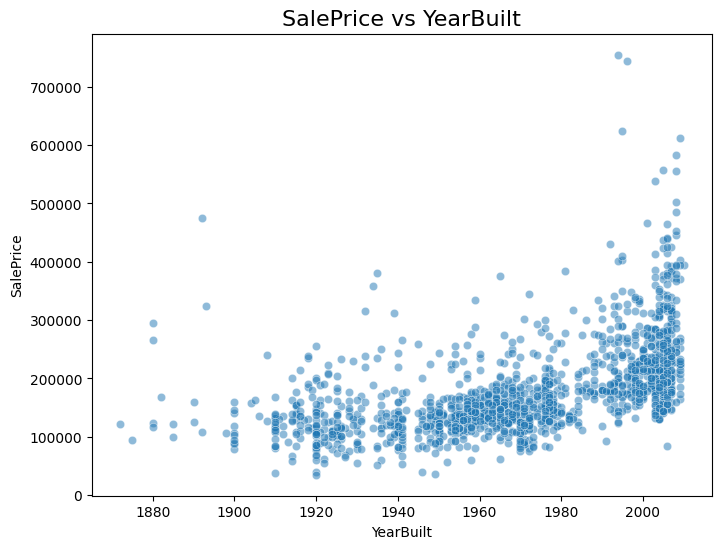

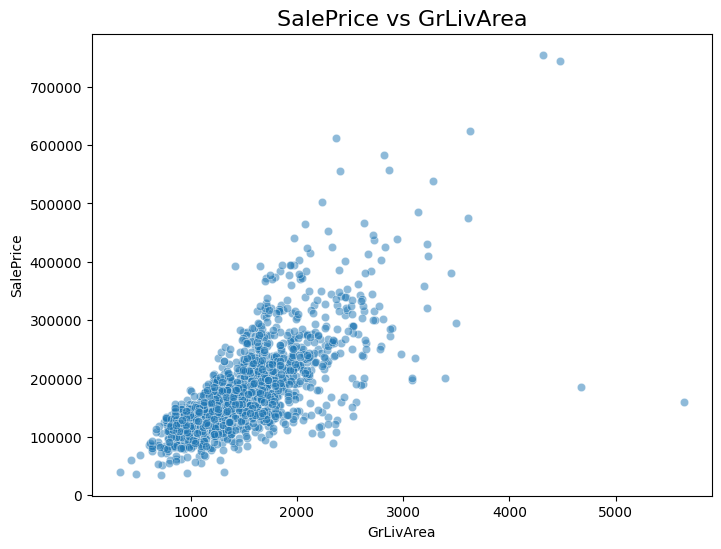

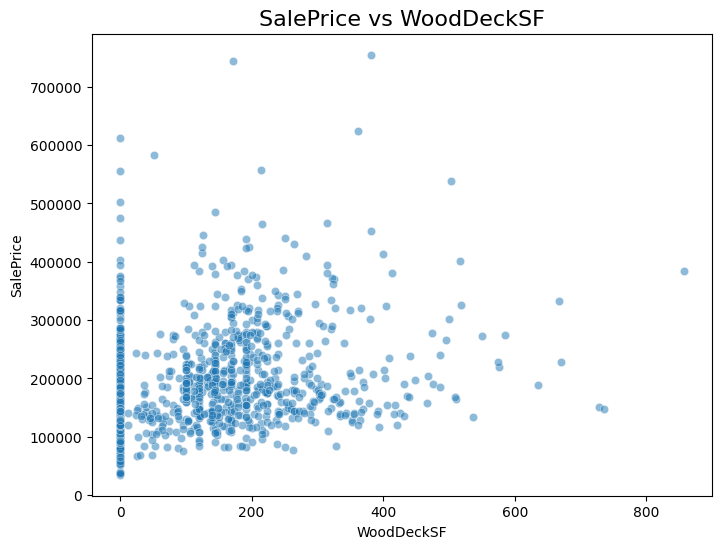

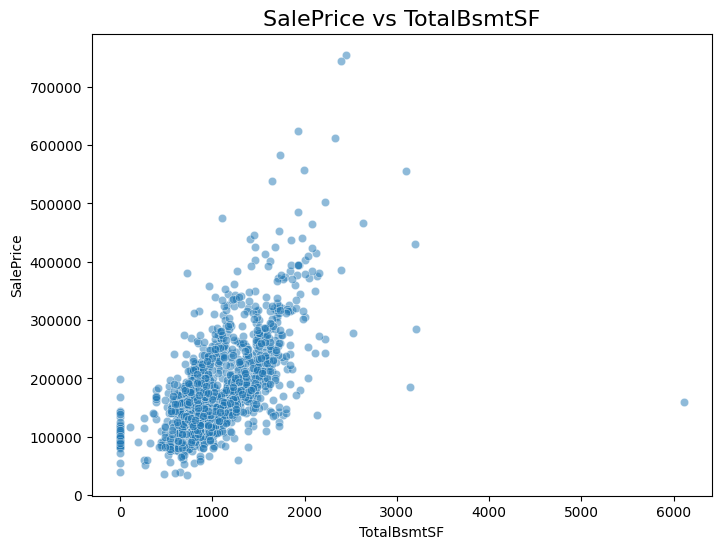

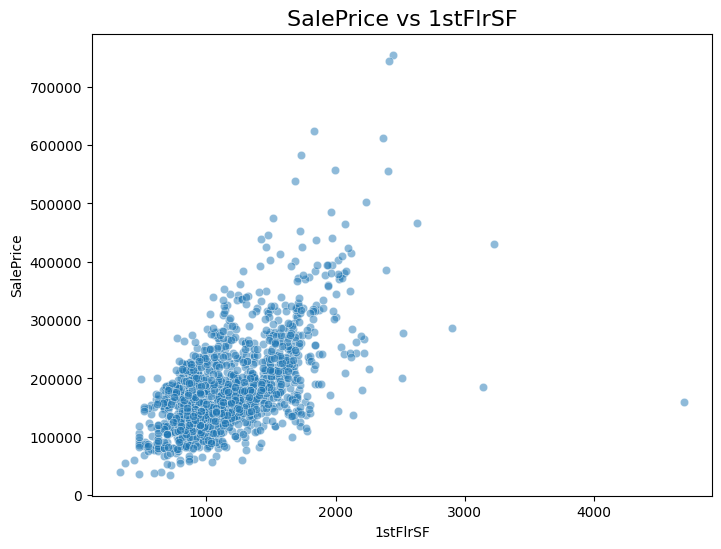

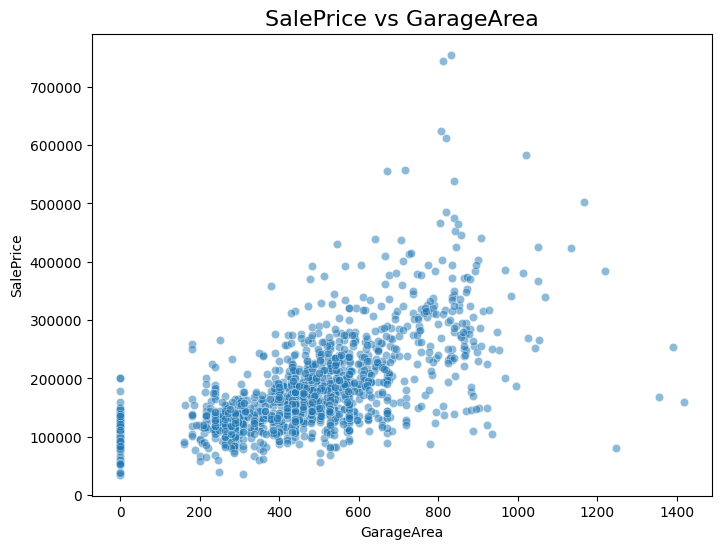

In [14]:
num_features = ['LotArea', 'YearBuilt', 'GrLivArea', 'WoodDeckSF', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

for feature in num_features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=train_data[feature], y=train_data['SalePrice'], alpha=0.5)
    plt.title(f'SalePrice vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

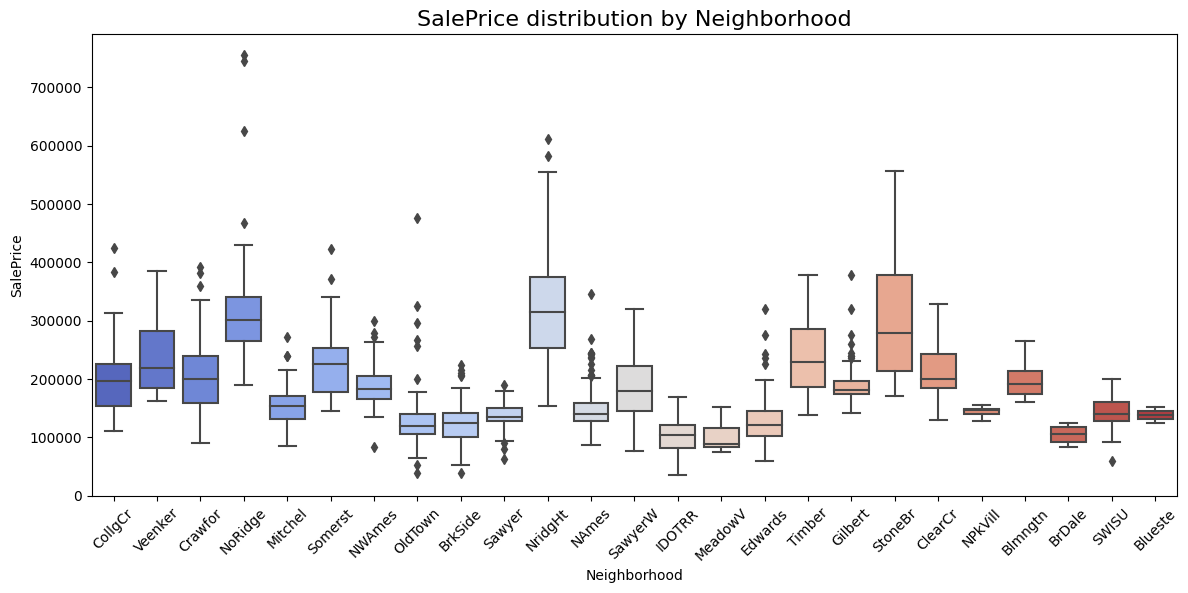

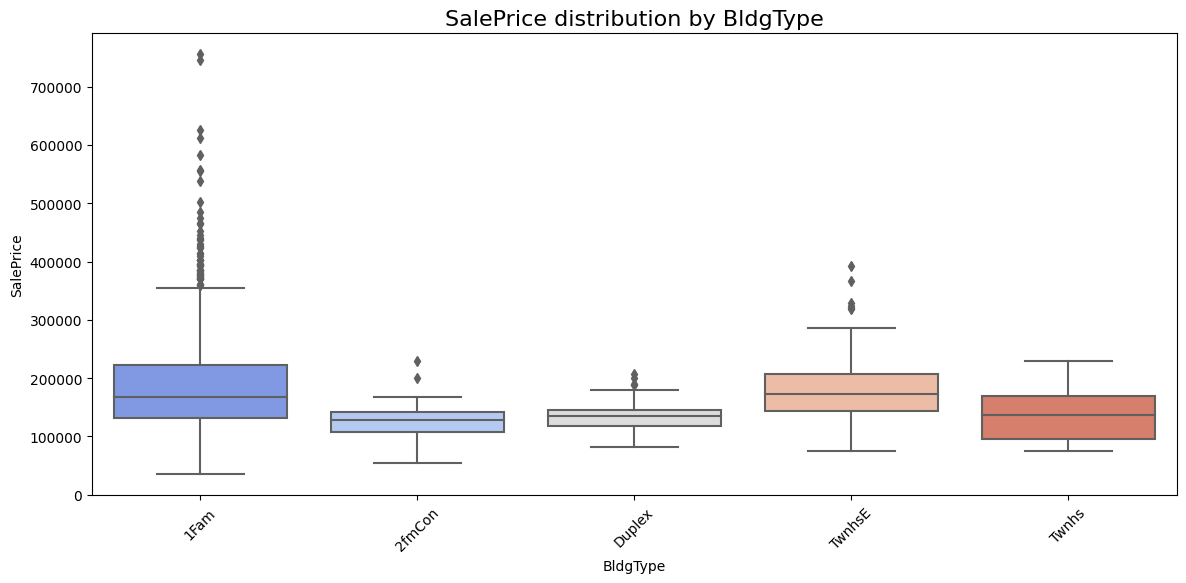

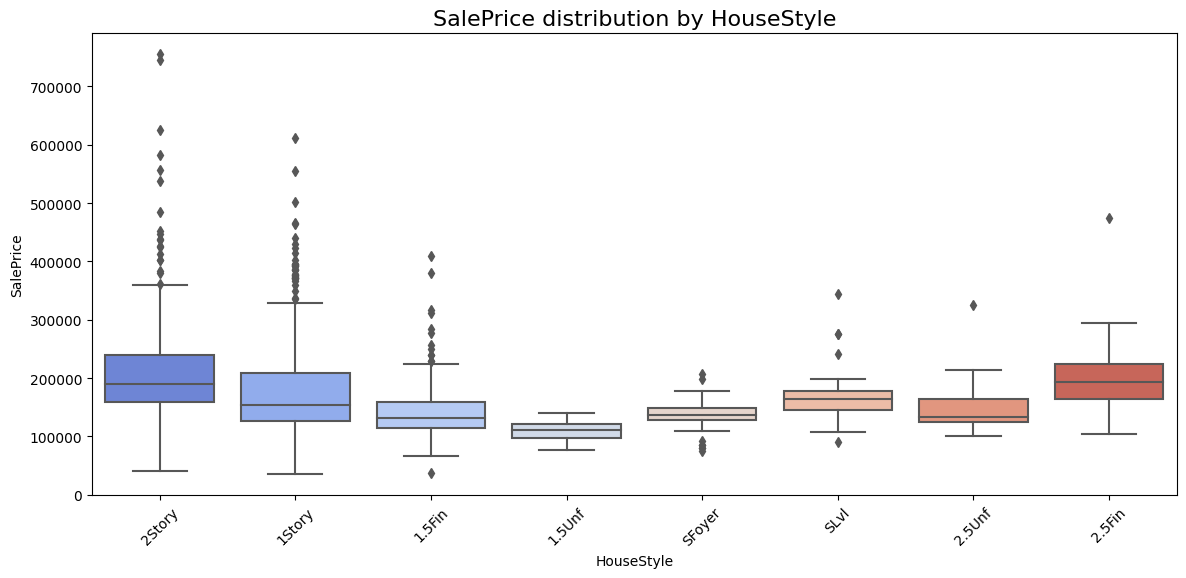

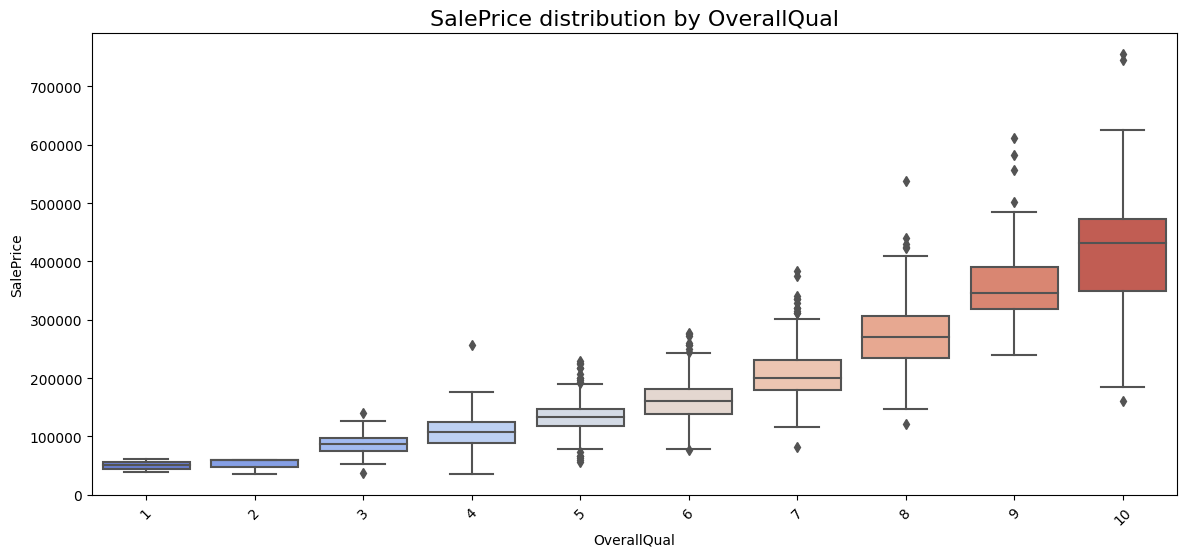

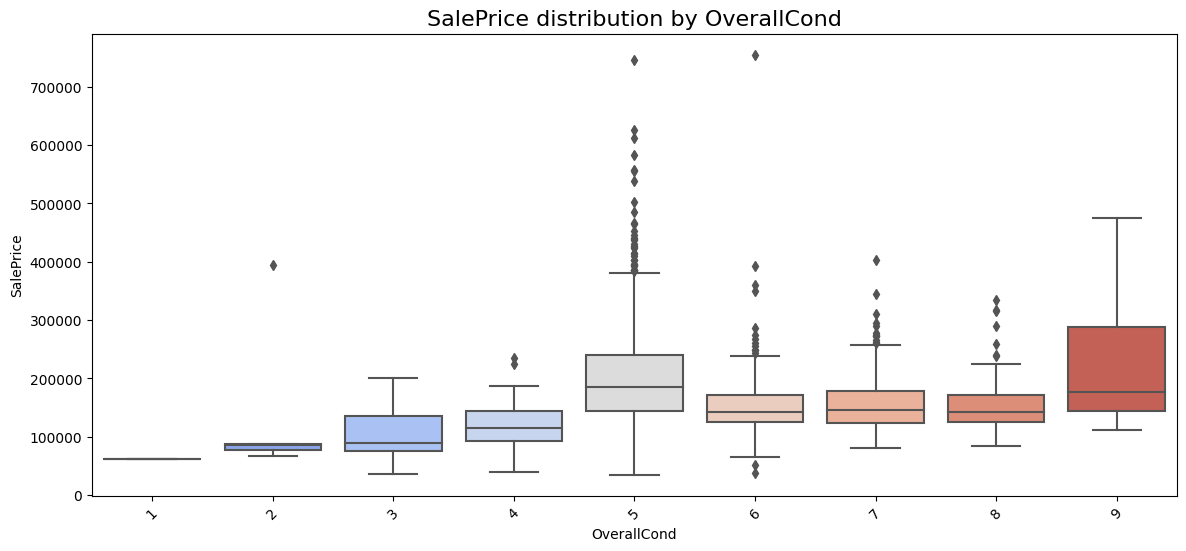

In [15]:
categorical_features = ['Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond']

for feature in categorical_features:
    plt.figure(figsize=(14,6))
    sns.boxplot(x=feature, y='SalePrice', data=train_data, palette="coolwarm")
    plt.title(f'SalePrice distribution by {feature}', fontsize=16)
    plt.xticks(rotation=45)
    plt.show()

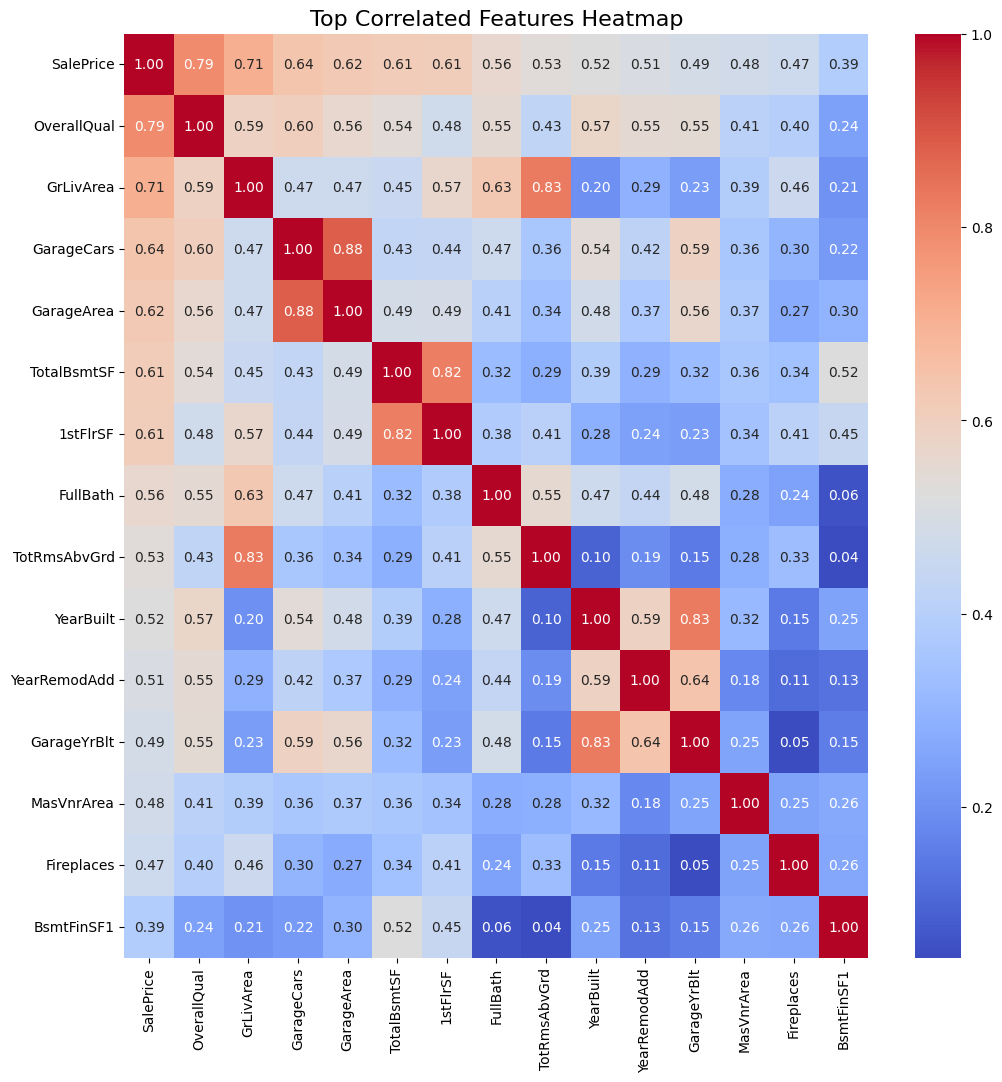

In [16]:
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train_data[numeric_features].corr()

top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(15).index

plt.figure(figsize=(12,12))
sns.heatmap(train_data[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Correlated Features Heatmap', fontsize=16)
plt.show()

In [17]:
y = train_data['SalePrice']
train_id = train_data['Id']
test_id = test_data['Id']

In [20]:
def base_model(df):
    df = df.copy()
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].fillna("None")
        df[col] = LabelEncoder().fit_transform(df[col])
    for col in df.select_dtypes(include=['int64', 'float64']):
        df[col] = df[col].fillna(df[col].median())
    return df

In [21]:
X_train_drop = base_model(train_data.drop(["Id", "SalePrice"], axis=1))
X_test_drop = base_model(test_data.drop("Id", axis=1))
#y = LabelEncoder().fit_transform(train_data['SalePrice'])

In [22]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
oof = np.zeros(len(X_train_drop))
preds = np.zeros(len(X_test_drop))

In [23]:
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_drop, y)):
    X_train, X_val = X_train_drop.iloc[train_idx], X_train_drop.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = XGBRegressor(
                    n_estimators=1000,
                    learning_rate=0.01,
                    max_depth=6,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    reg_alpha=1,
                    reg_lambda=1,
                    random_state=42,
                    n_jobs=-1
            )
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=100,
        verbose=100
    )
    
    oof[val_idx] = model.predict(X_val)
    preds += model.predict(X_test_drop) / kf.n_splits

[0]	validation_0-rmse:71492.33623
[100]	validation_0-rmse:34873.30216
[200]	validation_0-rmse:22929.78918
[300]	validation_0-rmse:19299.90654
[400]	validation_0-rmse:18065.12402
[500]	validation_0-rmse:17649.37368
[600]	validation_0-rmse:17477.52233
[700]	validation_0-rmse:17355.26054
[800]	validation_0-rmse:17312.94578
[889]	validation_0-rmse:17308.06706
[0]	validation_0-rmse:68836.50582
[100]	validation_0-rmse:37860.39679
[200]	validation_0-rmse:29881.03288
[300]	validation_0-rmse:27850.22455
[400]	validation_0-rmse:27236.09409
[500]	validation_0-rmse:27042.46554
[600]	validation_0-rmse:26935.40844
[700]	validation_0-rmse:26863.32832
[800]	validation_0-rmse:26854.12460
[825]	validation_0-rmse:26859.51207
[0]	validation_0-rmse:91545.86366
[100]	validation_0-rmse:49530.53464
[200]	validation_0-rmse:33046.92326
[300]	validation_0-rmse:27393.27211
[400]	validation_0-rmse:25191.90519
[500]	validation_0-rmse:24214.45638
[600]	validation_0-rmse:23743.88842
[700]	validation_0-rmse:23469.6253

In [24]:
rmse = mean_squared_error(y, oof, squared=False)
print(f"CV RMSE: {rmse:.4f}")

CV RMSE: 25469.4829


In [27]:
submission = pd.DataFrame({
    "Id": test_id,
    "SalePrice": preds
})
submission.to_csv("submission.csv", index=False)
print("submission.csv has been created.")

submission.csv has been created.
